In [2]:
from mrcnn.config import Config
from mrcnn import model as modellib
from mrcnn import visualize
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
#from tf import keras
import colorsys
import argparse
import imutils
import random
import os

In [3]:
CLASS_NAMES = open("class.txt").read().strip().split("\n")
# generate random (but visually distinct) colors for each class label
# (thanks to Matterport Mask R-CNN for the method!)
hsv = [(i / len(CLASS_NAMES), 1, 1.0) for i in range(len(CLASS_NAMES))]
COLORS = list(map(lambda c: colorsys.hsv_to_rgb(*c), hsv))
random.seed(42)
random.shuffle(COLORS)

In [4]:
class SimpleConfig(Config):
    # give the configuration a recognizable name
    NAME = "coco_inference"
    # set the number of GPUs to use along with the number of images
    # per GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    # number of classes (we would normally add +1 for the background
    # but the background class is *already* included in the class
    # names)
    NUM_CLASSES = 81

In [5]:
config = SimpleConfig()
config.display()

model = modellib.MaskRCNN(mode="inference", config=config, model_dir=os.getcwd())
model.load_weights("mask_rcnn_coco.h5", by_name=True)


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [ ]:
image = cv2.imread("farewell.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = imutils.resize(image, width=512)
# perform a forward pass of the network to obtain the results
print("[INFO] making predictions with Mask R-CNN...")
r1 = model.detect([image], verbose=1)[0]

[INFO] making predictions with Mask R-CNN...
Processing 1 images
image                    shape: (384, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


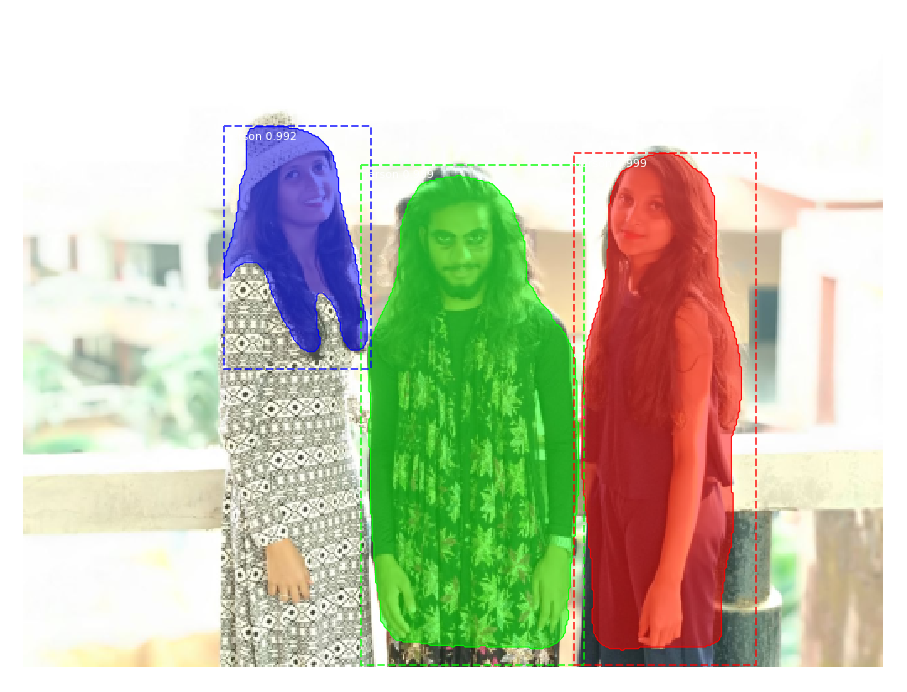

In [69]:
"""r1 = result[0]
visualize.display_instances(image, r1['rois'], r1['masks'], r1['class_ids'], 
                            CLASS_NAMES, r1['scores'])"""

In [71]:
"""image1 = cv2.imread("IMG_2254.jpg")
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image1 = imutils.resize(image1, width=512)
# perform a forward pass of the network to obtain the results
print("[INFO] making predictions with Mask R-CNN...")
result1 = model.detect([image1], verbose=1)"""

TypeError: unsupported operand type(s) for /: 'dict' and 'float'

In [72]:
"""r2 = result1[0]
visualize.display_instances(image, r2['rois'], r2['masks'], r2['class_ids'], CLASS_NAMES, r2['scores'])"""

"r2 = result1[0]\nvisualize.display_instances(image, r2['rois'], r2['masks'], r2['class_ids'], CLASS_NAMES, r2['scores'])"

In [74]:
"""image1 = cv2.imread("8433365521_9252889f9a_z.jpg")
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image1 = imutils.resize(image1, width=512)
# perform a forward pass of the network to obtain the results
print("[INFO] making predictions with Mask R-CNN...")
result1 = model.detect([image1], verbose=1)"""

'image1 = cv2.imread("8433365521_9252889f9a_z.jpg")\nimage1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)\nimage1 = imutils.resize(image1, width=512)\n# perform a forward pass of the network to obtain the results\nprint("[INFO] making predictions with Mask R-CNN...")\nresult1 = model.detect([image1], verbose=1)'

In [75]:
"""r2 = result1[0]
visualize.display_instances(image, r2['rois'], r2['masks'], r2['class_ids'], CLASS_NAMES, r2['scores'])"""

"r2 = result1[0]\nvisualize.display_instances(image, r2['rois'], r2['masks'], r2['class_ids'], CLASS_NAMES, r2['scores'])"

In [7]:
# loop over of the detected object's bounding boxes and masks
for i in range(0, r1["rois"].shape[0]):
    # extract the class ID and mask for the current detection, then
    # grab the color to visualize the mask (in BGR format)
    classID = r1["class_ids"][i]
    mask = r1["masks"][:, :, i]
    color = COLORS[classID][::-1]
    # visualize the pixel-wise mask of the object
    image = visualize.apply_mask(image, mask, color, alpha=0.5)

In [8]:
# convert the image back to BGR so we can use OpenCV's drawing
# functions
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
# loop over the predicted scores and class labels
for i in range(0, len(r1["scores"])):
    # extract the bounding box information, class ID, label, predicted
    # probability, and visualization color
    (startY, startX, endY, endX) = r1["rois"][i]
    classID = r1["class_ids"][i]
    label = CLASS_NAMES[classID]
    score = r1["scores"][i]
    color = [int(c) for c in np.array(COLORS[classID]) * 255]
    # draw the bounding box, class label, and score of the object
    cv2.rectangle(image, (startX, startY), (endX, endY), color, 2)
    text = "{}: {:.3f}".format(label, score)
    y = startY - 10 if startY - 10 > 10 else startY + 10
    cv2.putText(image, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX,
        0.6, color, 2)
# show the output image
image2 = cv2.resize(image, (960,720), interpolation = cv2.INTER_AREA)
cv2.imshow("Output", image2)
cv2.imwrite("farewell_model.jpg",image2)
cv2.waitKey()

-1

In [11]:
cap = cv2.VideoCapture('VID_20160925_143720.mp4')

while(cap.isOpened()):
    ret, frame = cap.read()
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.1.1) C:\projects\opencv-python\opencv\modules\highgui\src\window.cpp:352: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'
